**CoyneSLab5.ipynb<br>
CSC 272 Spring 2022<br>
Author: Steven C Coyne<br>
Date: 04/17/2022**

## Lab 5: ML Linear Regression

Description: Analyzes the diabetes dataset with estimators from scikit-learn, primarily linear regression.

Problem Statement (from Deitel & Deitel pgs. 660-661):

15.15 (Linear Regression with the Diabetes Dataset)

Investigate the Diabetes dataset bundled with scikit-learn

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

The dataset contains 442 samples, each with 10 features and a label indicating the “disease progression one year after baseline.” Using this dataset, reimplement the steps of this chapter’s multiple linear regression case study  in Section 15.5. 

In [1]:
#obtain dataset
from sklearn.datasets import load_diabetes

#create dataset object
diabetes = load_diabetes()

In [2]:
#display description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
#start exploring data by confirming the number of samples and features
diabetes.data.shape

(442, 10)

In [4]:
diabetes.target.shape

(442,)

In [5]:
#check feature names
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
import pandas as pd

In [7]:
#configure pandas for our data
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('max_columns', 11)
pd.set_option('display.width', None)

In [8]:
#rename columns to be more informative
diabetes.feature_names = ['Age', 'Sex', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']

In [9]:
#convert to dataframe
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [10]:
#add target information (y) to the dataframe
diabetes_df['Progression'] = pd.Series(diabetes.target)

In [11]:
#examine data
diabetes_df.head()

,Age,Sex,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,Progression
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


In [12]:
#obtain some descriptive statistics
diabetes_df.describe()

,Age,Sex,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,Progression
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


In [13]:
#obtain random samples for use in plotting features against Progression
sample_df = diabetes_df.sample(frac=0.1, random_state=42)

In [14]:
#prepare for plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

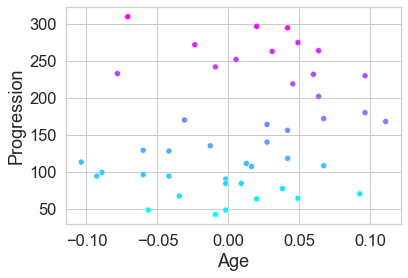

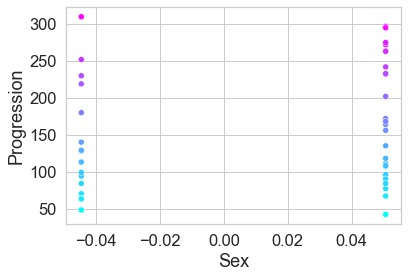

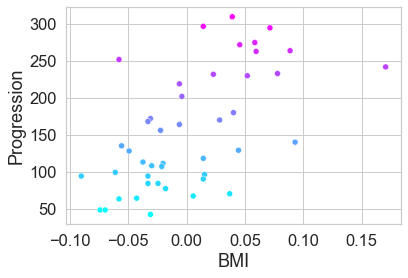

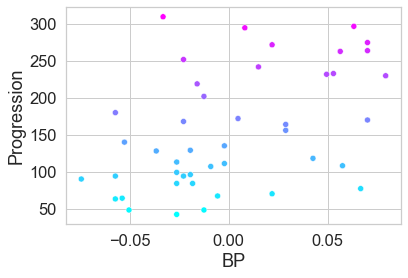

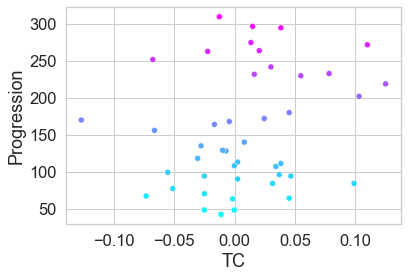

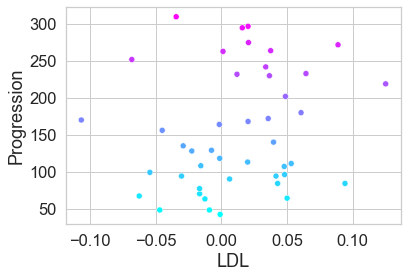

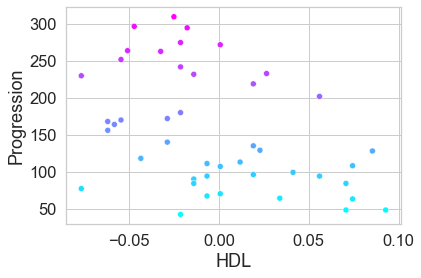

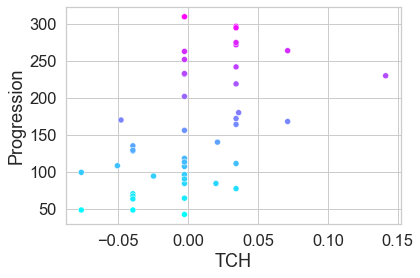

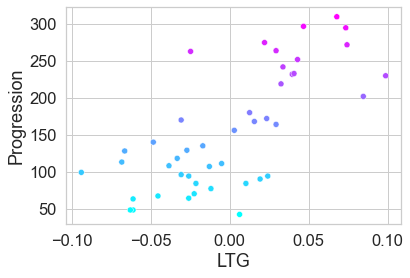

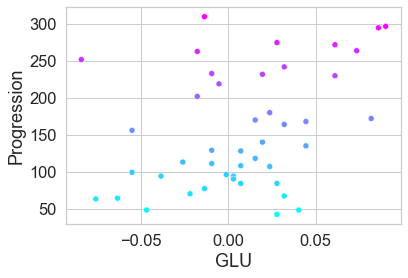

In [15]:
#loop to plot features against progression to see their impact on the outcome
for feature in diabetes.feature_names:
    plt.figure()
    sns.scatterplot(data=sample_df, x=feature, y='Progression', hue='Progression', palette='cool', legend=False)

In [16]:
#split the data into train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=42)

In [17]:
#Check shapes of subsets
X_train.shape

(331, 10)

In [18]:
X_test.shape

(111, 10)

In [19]:
#import and train the estimator model, linear regression
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [20]:
#train on our training data
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [21]:
#examine coefficients for each feature
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

       Age: 47.746571173531095
       Sex: -241.9918036108793
       BMI: 531.968568964711
        BP: 381.56529921822465
        TC: -918.4902055208888
       LDL: 508.25147384684465
       HDL: 116.94040498015747
       TCH: 269.48508570884457
       LTG: 695.8062205026956
       GLU: 26.323431441266724


In [22]:
#examine intercept
linear_regression.intercept_

151.66516982689936

In [23]:
#set up arrays of predictions and expected values
predicted = linear_regression.predict(X_test)
expected = y_test

In [24]:
#compare first five predictions to the expected values:
predicted[:5]

array([137.94979889, 182.53621462, 129.85554049, 292.55738727,
       124.86559124])

In [25]:
expected[:5]

array([219.,  70., 202., 230., 111.])

In [26]:
#compare expected and predicted values with a dataframe
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

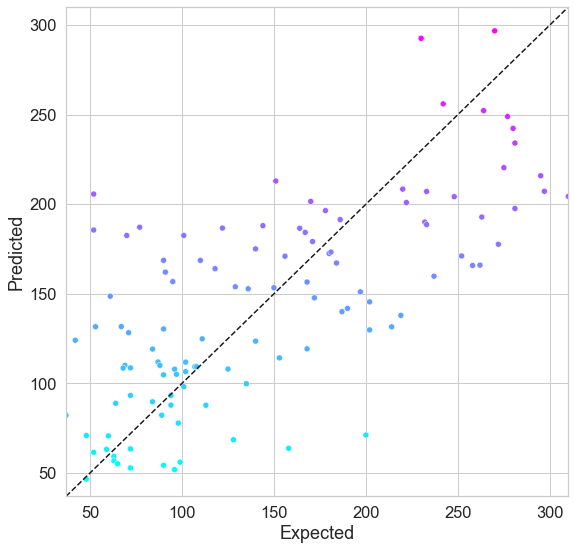

In [27]:
#prepare and display plot
figure = plt.figure(figsize=(9, 9))
#scatterplot to represent each sample and its prediction's accuracy
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

#configure ranges of the graph
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)

#add a line representing perfect accuracy
line = plt.plot([start, end], [start, end], 'k--')

We can observe a general relationship between these, so the estimator is at least working to some extent.


In [28]:
#calculate R2 score
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.48490866359058016

In [29]:
#calculate mean squared error

metrics.mean_squared_error(expected, predicted)

2848.2953079329427

In [30]:
#import various other estimators to see if any perform better than linear regression

from sklearn.linear_model import ElasticNet, Lasso, Ridge

#put all estimators in a dectionary to be iterated through
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
    }

In [31]:
#compare the estimators using k-fold cross validation to see how they perform
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
                             X=diabetes.data, y=diabetes.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.465
      ElasticNet: mean of r2 scores=-0.021
           Lasso: mean of r2 scores=0.325
           Ridge: mean of r2 scores=0.409


It seems that none of the methods performs better than linear regression, and none of the options performs as well as we would necessarily like. More data may be required, or we can try hyperparameter tuning and other techniques.